<h1>Red Neuronal de Clasificación<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report

In [2]:
dfTrain = pd.read_csv("train.csv")
dfTrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#obtenemos los posibles valores que puede tomar el rango de precio
dfTrain['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [4]:
#observamos la información de las demas variables
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#correlación con la variable objetivo
corrTrain = dfTrain.corr()
print(corrTrain['price_range'].sort_values(ascending=False)[:8],'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
Name: price_range, dtype: float64 



In [6]:
#Selección de variables y verificación de datos nulos
dfFilter1 = dfTrain[["ram","battery_power","px_width","px_height","int_memory","sc_w","pc","price_range"]]
dfFilter1.isnull().sum()

ram              0
battery_power    0
px_width         0
px_height        0
int_memory       0
sc_w             0
pc               0
price_range      0
dtype: int64

<AxesSubplot:>

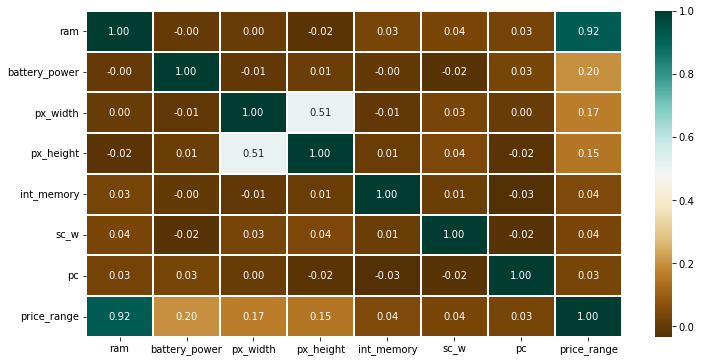

In [7]:
#matriz de correlación de los datos seleccionados
plt.figure(figsize=(12, 6))
sns.heatmap(dfFilter1.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [8]:
y = dfFilter1['price_range']
X = dfFilter1.drop('price_range',axis=1)

In [9]:
sc = StandardScaler()
Xf = sc.fit_transform(X)
Xf

array([[ 0.39170341, -0.90259726, -1.14678403, ..., -1.38064353,
         0.2831028 , -1.3057501 ],
       [ 0.46731702, -0.49513857,  1.70446468, ...,  1.15502422,
        -0.63531667, -0.64598879],
       [ 0.44149774, -1.5376865 ,  1.07496821, ...,  0.49354568,
        -0.86492153, -0.64598879],
       ...,
       [ 0.86013895,  1.53077336,  0.88056489, ...,  0.21792962,
        -1.0945264 , -1.14080978],
       [-1.15745352,  0.62252745, -1.34581601, ...,  0.76916174,
         0.9719174 , -0.81092912],
       [ 1.65500399, -1.65833069, -1.15141268, ...,  0.71403853,
        -0.4057118 ,  1.00341448]])

In [10]:
yf = pd.get_dummies(y,columns = ['price_range'])

In [11]:
yf

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.3, random_state=0)

In [13]:
import tensorflow as tf
from keras.models import Sequential

#creación de la red neuronal
model = Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=7, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from sklearn.preprocessing import StandardScaler
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(x_train)

In [15]:
model.fit(x_train_new,y_train, epochs=300,verbose= False)

In [16]:
#evaluacion del desempeño de la red neuronal
rend = model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: %.2f%%\n" % (rend[1]*100))
rend2 = model.evaluate(x_test,y_test,verbose=False)
print("Testing Accuracy: %.2f%%\n" % (rend2[1]*100))

Training Accuracy: 99.93%

Testing Accuracy: 95.00%



In [17]:
#Realizando prediccinoes con los datos de test
y_testpred = model.predict(x_test)
y_testpred = np.round(y_testpred)

19/19 [==============================] - 0s 818us/step


In [18]:
y_finpredict = (np.argmax(y_testpred,axis=1)+1) #prediccion de la salida con valores maximo

y_testfin=[]
for i in range(len(y_test)):
    if (y_test.iloc[i,0]==1):
        y_testfin.append(1)
    if (y_test.iloc[i,1]==1):
        y_testfin.append(2)
    if (y_test.iloc[i,2]==1):
        y_testfin.append(3)
    if (y_test.iloc[i,3]==1):
        y_testfin.append(4)
print(y_testfin)

[4, 1, 3, 3, 3, 1, 1, 4, 4, 2, 2, 4, 1, 3, 4, 1, 4, 3, 3, 2, 1, 1, 4, 2, 3, 3, 4, 2, 4, 2, 2, 1, 3, 1, 2, 4, 1, 1, 4, 4, 4, 2, 4, 4, 2, 4, 1, 2, 4, 2, 2, 4, 1, 4, 1, 4, 3, 3, 1, 4, 4, 2, 4, 3, 2, 3, 4, 3, 3, 3, 4, 3, 2, 1, 2, 4, 3, 3, 2, 3, 4, 4, 4, 1, 1, 1, 3, 2, 3, 4, 2, 3, 3, 2, 1, 4, 4, 4, 1, 4, 2, 2, 3, 2, 4, 3, 3, 4, 3, 4, 4, 1, 1, 2, 4, 4, 1, 1, 2, 1, 1, 4, 3, 3, 2, 2, 2, 2, 1, 3, 2, 4, 3, 4, 4, 4, 4, 3, 1, 2, 2, 3, 2, 4, 2, 4, 1, 1, 3, 1, 2, 2, 2, 2, 4, 1, 1, 4, 2, 4, 3, 2, 4, 2, 3, 4, 4, 3, 2, 1, 4, 2, 3, 4, 4, 1, 3, 3, 4, 1, 3, 2, 1, 2, 3, 2, 3, 1, 4, 4, 2, 2, 1, 3, 4, 1, 2, 3, 3, 1, 4, 4, 4, 2, 3, 4, 4, 4, 1, 1, 1, 3, 4, 4, 1, 1, 2, 4, 2, 4, 4, 4, 1, 1, 3, 4, 4, 2, 1, 3, 1, 1, 1, 4, 3, 1, 3, 3, 2, 2, 1, 3, 4, 4, 1, 1, 2, 4, 4, 3, 4, 1, 4, 2, 2, 1, 3, 4, 4, 3, 1, 1, 2, 3, 4, 3, 3, 4, 3, 2, 1, 4, 4, 3, 2, 4, 3, 3, 3, 2, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 4, 1, 2, 3, 4, 1, 3, 1, 2, 2, 4, 1, 1, 3, 4, 2, 3, 1, 3, 1, 4, 1, 4, 4, 3, 4, 2, 3, 3, 2, 2, 2, 1, 2, 1, 4, 2, 1, 4, 1, 1, 

In [19]:
#realizando la matriz de confusion
cm = confusion_matrix(y_finpredict,y_testfin)

In [20]:
print(cm)

[[150   5   1   0]
 [  1 127   7   0]
 [  0   3 137   7]
 [  0   0   6 156]]


0
1
2
3


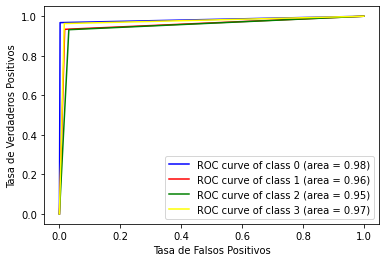

In [21]:
#curva rogue
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    print(i)
    fpr[i],tpr[i],_= roc_curve(y_testpred[:,i],y_test.iloc[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
colors = ['blue','red','green','yellow']
for i,color in zip(range(4),colors):
    plt.plot(fpr[i],tpr[i],color = color,
    label = 'ROC curve of class {0} (area = {1:0.2f})'
    ''.format(i, roc_auc[i]))

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc = 'lower right')
plt.show()

In [22]:
#reporte de clasificasion
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.93      0.94      0.94       135
           2       0.93      0.91      0.92       151
           3       0.96      0.96      0.96       163

   micro avg       0.95      0.95      0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600
 samples avg       0.95      0.95      0.95       600



C:\Users\jcarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
